<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset

https://doi.org/10.13026/9ay4-2c37



I used the Infrared Thermography Temperature Dataset which was linked above. I obtained this dataset from the UC Irvine Machine Learning Repo.

During the COVID19 Pandemic, it was a requirement at some places to get your temperature taken to verify if you have a fever or not. Some places collected this temperature data and saved it.

There are many reasons this temperature data may be useful to analyze. These temperatures were taken using infrared cameras. By analyzing this temerature data, we might be able to analyze the effectiveness of this technology. This data is also useful for healthcare reasons. You would want to know the temperature distribution throughout different demographic categories to make sure nothing wierd is going on. Data on the environmental condition was also collected. Analysis of this data might offer some insight into the effects of the environment on body temperature regulation.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### Importing the Dataset

First, I imported the dataset directly from UCI machine learning repos website

They had a import python button that returned the code bellow. I pasted it and imported the data.

The data imported was nested in a dictionary. The dictionary had a complex structure. I had to dig in the structure of the dictionary and finally found the raw data nested under multiple levels of dictionaries.

In [1]:
#importing the dataset

#this code is directly from the uci machine learning repo website:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 
  
# metadata 
#print(infrared_thermography_temperature.metadata) 
  
# variable information 
#print(infrared_thermography_temperature.variables) 
#print(type(infrared_thermography_temperature))
#print(infrared_thermography_temperature.keys())
raw_dat=infrared_thermography_temperature.data

#print(raw_dat.keys())
#print(raw_dat.features)
print(raw_dat.original)

raw_dat_og=raw_dat.original
#print(type(raw_dat_og))

      SubjectID  aveOralF  aveOralM  Gender    Age                  Ethnicity  \
0      161117-1     36.85     36.59    Male  41-50                      White   
1      161117-2     37.00     37.19  Female  31-40  Black or African-American   
2      161117-3     37.20     37.34  Female  21-30                      White   
3      161117-4     36.85     37.09  Female  21-30  Black or African-American   
4      161117-5     36.80     37.04    Male  18-20                      White   
...         ...       ...       ...     ...    ...                        ...   
1015  180425-05     36.95     36.99  Female  21-25                      Asian   
1016  180425-06     37.25     37.19  Female  21-25                      White   
1017  180502-01     37.35     37.59  Female  18-20  Black or African-American   
1018  180507-01     37.15     37.29    Male  26-30            Hispanic/Latino   
1019  180514-01     37.05     37.19  Female  18-20                      White   

      T_atm  Humidity  Dist

### Cleaning the Dataset

Now I clean the dataset by removing many of the columns and only selecting the columns that are of interest to me.

In [3]:
import pandas as pd

#cleaning the dataset
#selecting the columns that I am interested in

yes_col = ['aveOralF', 'aveOralM', 'Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance']


short_infrared = raw_dat_og[yes_col]


print(short_infrared)


      aveOralF  aveOralM  Gender    Age                  Ethnicity  T_atm  \
0        36.85     36.59    Male  41-50                      White   24.0   
1        37.00     37.19  Female  31-40  Black or African-American   24.0   
2        37.20     37.34  Female  21-30                      White   24.0   
3        36.85     37.09  Female  21-30  Black or African-American   24.0   
4        36.80     37.04    Male  18-20                      White   24.0   
...        ...       ...     ...    ...                        ...    ...   
1015     36.95     36.99  Female  21-25                      Asian   25.7   
1016     37.25     37.19  Female  21-25                      White   25.7   
1017     37.35     37.59  Female  18-20  Black or African-American   28.0   
1018     37.15     37.29    Male  26-30            Hispanic/Latino   25.0   
1019     37.05     37.19  Female  18-20                      White   23.8   

      Humidity  Distance  
0         28.0       0.8  
1         26.0       

### Looking for Missing Data

Here, I wrote a code to look for missing data.

In [4]:
#Looking For Missing Data

missing_data_counts = short_infrared.isnull().sum()

print("Counts of missing data for each column:")
print(missing_data_counts)

columns_with_missing_data = missing_data_counts[missing_data_counts > 0]
print("\nColumns with missing data and their counts:")
print(columns_with_missing_data)

any_missing = short_infrared.isnull().any().any()

print("\nAre there any missing values in the DataFrame? ", "Yes" if any_missing else "No")

Counts of missing data for each column:
aveOralF     0
aveOralM     0
Gender       0
Age          0
Ethnicity    0
T_atm        0
Humidity     0
Distance     2
dtype: int64

Columns with missing data and their counts:
Distance    2
dtype: int64

Are there any missing values in the DataFrame?  Yes


There are only 2 entries missing in the "distance" column. This is ok and missing data is minimal. We will be removing the rows with missing data afterwards.

### Summary Statistics

Here, I wrote code to calculate the summary statistics of the numerical variables.

In [5]:
#Summary Stats

numeric_cols= ['aveOralF', 'aveOralM', 'T_atm', 'Humidity', 'Distance']

summary_stats = short_infrared[numeric_cols].describe()
summary_stats.loc['var'] = short_infrared[numeric_cols].var()
summary_stats.loc['range'] = summary_stats.loc['max'] - summary_stats.loc['min']
print(summary_stats)

          aveOralF     aveOralM        T_atm     Humidity     Distance
count  1020.000000  1020.000000  1020.000000  1020.000000  1018.000000
mean     36.979216    37.028382    24.115392    28.723039     0.729784
std       0.386403     0.509502     1.336338    13.071627     2.456486
min      35.750000    35.540000    20.200000     9.900000     0.540000
25%      36.800000    36.777500    23.400000    17.600000     0.600000
50%      36.900000    36.940000    24.000000    26.300000     0.620000
75%      37.100000    37.140000    24.700000    36.200000     0.700000
max      39.600000    40.340000    29.100000    61.200000    79.000000
var       0.149308     0.259593     1.785798   170.867427     6.034324
range     3.850000     4.800000     8.900000    51.300000    78.460000


These summary statistics don't mean much unless visualized. Since the pourpose of this assignment is to work on visualizations, I will work on visualizing some of these things later.

### Getting Count

Then, I wrote some code that displayed the count of each unique category of the categorical variables.

In [6]:
#getting count

categorical_columns = ['Gender', 'Age', 'Ethnicity']  

for column in categorical_columns:
    print(f"Count of unique occurrences in '{column}':")
    print(short_infrared[column].value_counts())
    print("\n")

Count of unique occurrences in 'Gender':
Gender
Female    606
Male      414
Name: count, dtype: int64


Count of unique occurrences in 'Age':
Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64


Count of unique occurrences in 'Ethnicity':
Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64




# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

A majority of the people that had there temperature taken were younger. Not that much data was collected on older individuals. Also, the bins for age are inconsistant and some overlap.
Let us only look at people that are 40 or younger. I removed the age column after filtering since age now is obsolete.

In [7]:
age_groups_to_include = ['18-20', '21-25', '26-30', '31-40', '21-30']

young_infrared = short_infrared[short_infrared['Age'].isin(age_groups_to_include)]
young_infrared = young_infrared.drop(columns=['Age'])

print(young_infrared)

      aveOralF  aveOralM  Gender                  Ethnicity  T_atm  Humidity  \
1        37.00     37.19  Female  Black or African-American   24.0      26.0   
2        37.20     37.34  Female                      White   24.0      26.0   
3        36.85     37.09  Female  Black or African-American   24.0      27.0   
4        36.80     37.04    Male                      White   24.0      27.0   
5        36.90     36.99  Female                      White   24.0      26.0   
...        ...       ...     ...                        ...    ...       ...   
1015     36.95     36.99  Female                      Asian   25.7      50.8   
1016     37.25     37.19  Female                      White   25.7      50.8   
1017     37.35     37.59  Female  Black or African-American   28.0      24.3   
1018     37.15     37.29    Male            Hispanic/Latino   25.0      39.8   
1019     37.05     37.19  Female                      White   23.8      45.6   

      Distance  
1          0.8  
2    

I am interested in seeing the effect humidity and temperature has on the temperature taken.

I will narrow down my dataframe to only include entries from days where the relative humidity and relative ambient temperature were above mean.

In [11]:
mean_humidity = young_infrared['Humidity'].mean()
mean_t_atm = young_infrared['T_atm'].mean()

humid_hot_infrared = young_infrared[(young_infrared['Humidity'] > mean_humidity) & (young_infrared['T_atm'] > mean_t_atm)]

print(humid_hot_infrared)

      aveOralF  aveOralM  Gender                  Ethnicity  T_atm  Humidity  \
7        36.80     36.49  Female                      White   25.0      30.0   
8        36.80     36.59  Female                      Asian   25.0      30.0   
9        36.80     36.89    Male                Multiracial   26.0      31.0   
81       38.55     38.59  Female                      White   24.8      40.5   
82       36.45     36.09  Female                      White   25.0      40.1   
...        ...       ...     ...                        ...    ...       ...   
1013     36.95     37.04    Male  Black or African-American   25.4      51.1   
1014     36.95     36.99  Female            Hispanic/Latino   25.7      50.8   
1015     36.95     36.99  Female                      Asian   25.7      50.8   
1016     37.25     37.19  Female                      White   25.7      50.8   
1018     37.15     37.29    Male            Hispanic/Latino   25.0      39.8   

      Distance  
7         0.80  
8    

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



### Part 1: Matplotlib

#### Graph 1 -- Scatterplot

For the first visualization, I will make a scatterplot to visualize the effect ambient temperature has on body temperature.
Body temperature will be in the y-axis and body temperature will be in the x-axis.

I first set a custom figure dimension of 10 x 6 inches. I then called the scatterplot with the blue color. I also changed the marker size to 10

I added a figure title with size 14 font, and x and y lable size 12 font. I changed the tick lables to size 10 font and rotated the x tick by 45 degrees.

I then added a legend to the upper right hand side of the graph, located outside the graph by setting a costum bbox_to_anchor value. I then added a line to indicate noprmal body temperature. Finally, i set grid to true so that the figure displays the grid.

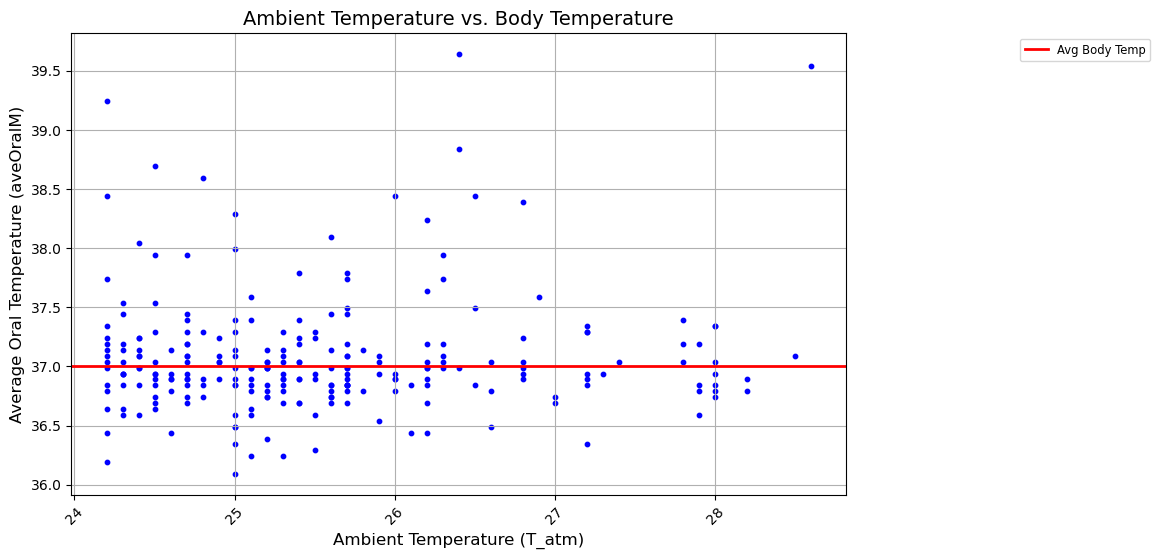

In [24]:
import matplotlib.pyplot as plt

#setting custom figure dimension
plt.figure(figsize=(10, 6))

#scatter plot, color is blue, marker size 10

plt.scatter(humid_hot_infrared['T_atm'], humid_hot_infrared['aveOralM'], color='blue', s=10)

#Adding graph title @ size 14 font
plt.title('Ambient Temperature vs. Body Temperature', fontsize=14)

#x and y lables and size 12 font
plt.xlabel('Ambient Temperature (T_atm)', fontsize=12)
plt.ylabel('Average Oral Temperature (aveOralM)', fontsize=12)

#rotates x tick lables 45 degrees and change font size to 10
plt.xticks(fontsize=10, rotation=45)

#change y tick lables size to 10
plt.yticks(fontsize=10)

#adds legend to the upper right at those specific coordinates
plt.legend(['Oral Temp.'], loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))

#I want it to show a grid
plt.grid(True)

#adding a line to indicate normal body temperature
plt.axhline(y=37, color='red', linestyle='-', linewidth=2, label='Avg Body Temp')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels + ['Avg Body Temp'], loc='upper right', fontsize='small', bbox_to_anchor=(1.4, 1))

#display graph
plt.show()


There seems to be absolutely no correlation between ambient temperature and body temperature. The spread seems random. There are people above and below normal body temperature at all ambient temperatures.

#### Graph 2 - Box and Whiskers Plot

For my second visualization, I ploted a box and whiskers plot to show the distribution of body temperature for each ethnic category. 

I started by first setting a coustom figure size of 12 x 8 inches. Then, I defined the boxplot to have the categories of ethnicity. I set patch_artist as true to fill the boxes with color. Then, I changed the color of each box to a coustom color.

Afterwards, I removed the automatic title generated by matplotlib and created my own title. I then lable and edit the font size of the x and y axis, as well ans change the tick size and rotate x by 45 degrees.

I also add a arrow pointing at the median line of the first box to highlight where the median line is.

<Figure size 1200x800 with 0 Axes>

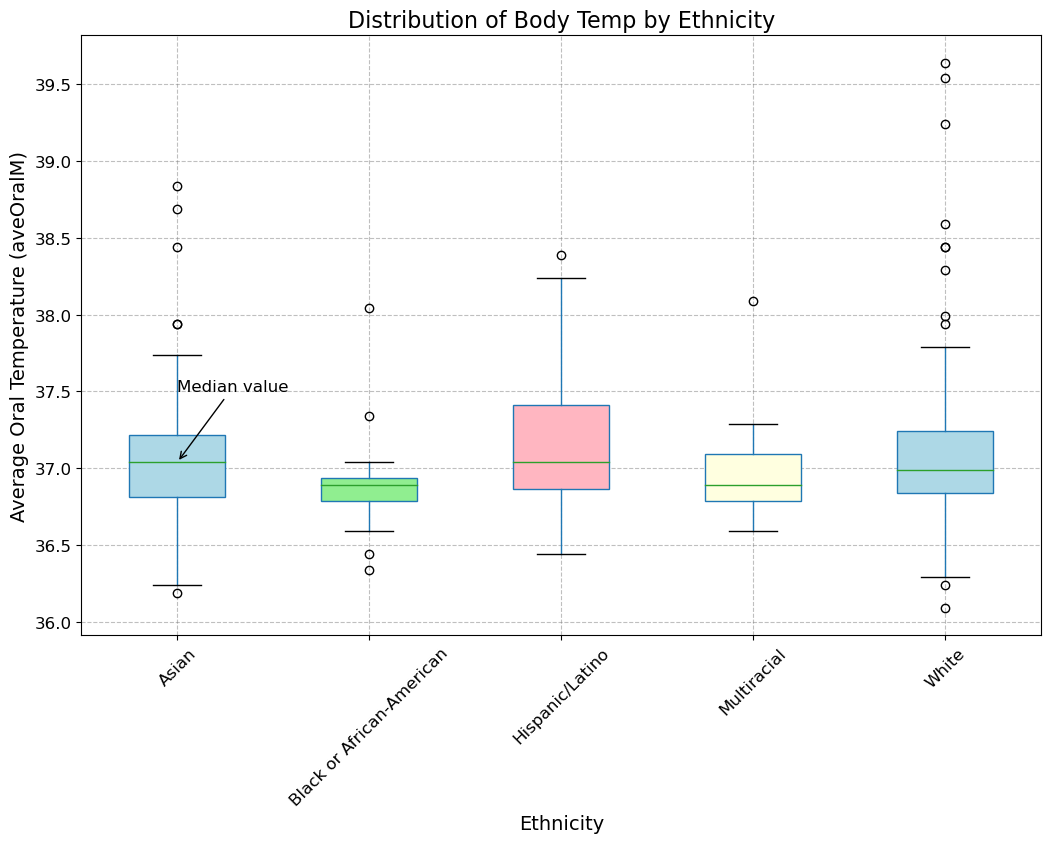

In [25]:
#coustom fig size
plt.figure(figsize=(12, 8)) 

#create boxplot where the different categories are the ethnicity.
#color filling patch_artist=true

boxplot = humid_hot_infrared.boxplot(column='aveOralM', by='Ethnicity', patch_artist=True, figsize=(12, 8))

#changing the colors of the boxes
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow'] 
for patch, color in zip(boxplot.patches, colors * len(humid_hot_infrared['Ethnicity'].unique())):
    patch.set_facecolor(color)

#adding custom title and remove automatic title
plt.title('Distribution of Body Temp by Ethnicity', fontsize=16)
plt.suptitle('')

#lable axis and change font size
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Average Oral Temperature (aveOralM)', fontsize=14)

#modifying tick and rotating 45 degrees
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#highlight median value for each group
plt.annotate('Median value', xy=(1, humid_hot_infrared.groupby('Ethnicity')['aveOralM'].median().iloc[0]), 
             xytext=(1, 37.5),  
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

#coustom grid
plt.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

plt.show()

The distribution of body temperature seems consistant across ethnic group. However, we are dealing with a low sample size for some of these categories so we cannot know for sure. 


### Part 2 -- Seaborn

Now, I do the same graphs as above but using seaborn

#### Graph 1 -- Scatterplot

Here, I recreate the same graph as above using seaborn.

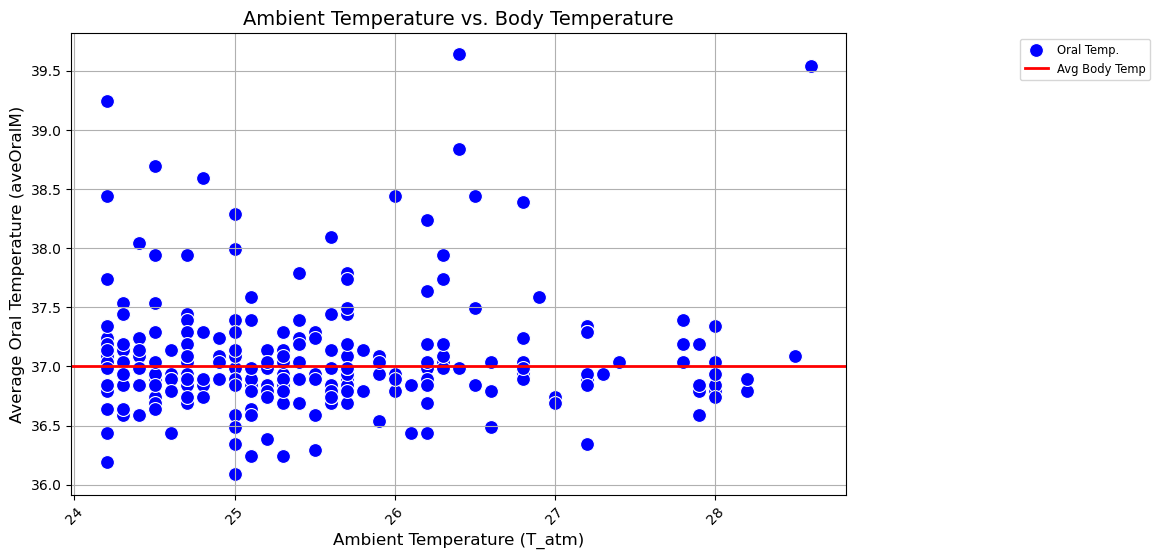

In [26]:
import seaborn as sns

#coustom dims
plt.figure(figsize=(10, 6))

#creating seaborn scatterplot. color is blue. marker size is bigger
sns.scatterplot(data=humid_hot_infrared, x='T_atm', y='aveOralM', color='blue', s=100)  

#adding graph title with size 14 font
plt.title('Ambient Temperature vs. Body Temperature', fontsize=14)

#setting x and y labels with size 12 font
plt.xlabel('Ambient Temperature (T_atm)', fontsize=12)
plt.ylabel('Average Oral Temperature (aveOralM)', fontsize=12)

#rotating x tick labels 45 deg and changing size
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

#adding a grid
plt.grid(True)

#adding a normal body temp line
plt.axhline(y=37, color='red', linestyle='-', linewidth=2)

#legend
plt.legend(['Oral Temp.', 'Avg Body Temp'], loc='upper right', fontsize='small', bbox_to_anchor=(1.4, 1))

plt.show()

#### Graph 2 - Box and Whiskers Plot

Here I recreate the box and whiskers plot created above but using seaborn.

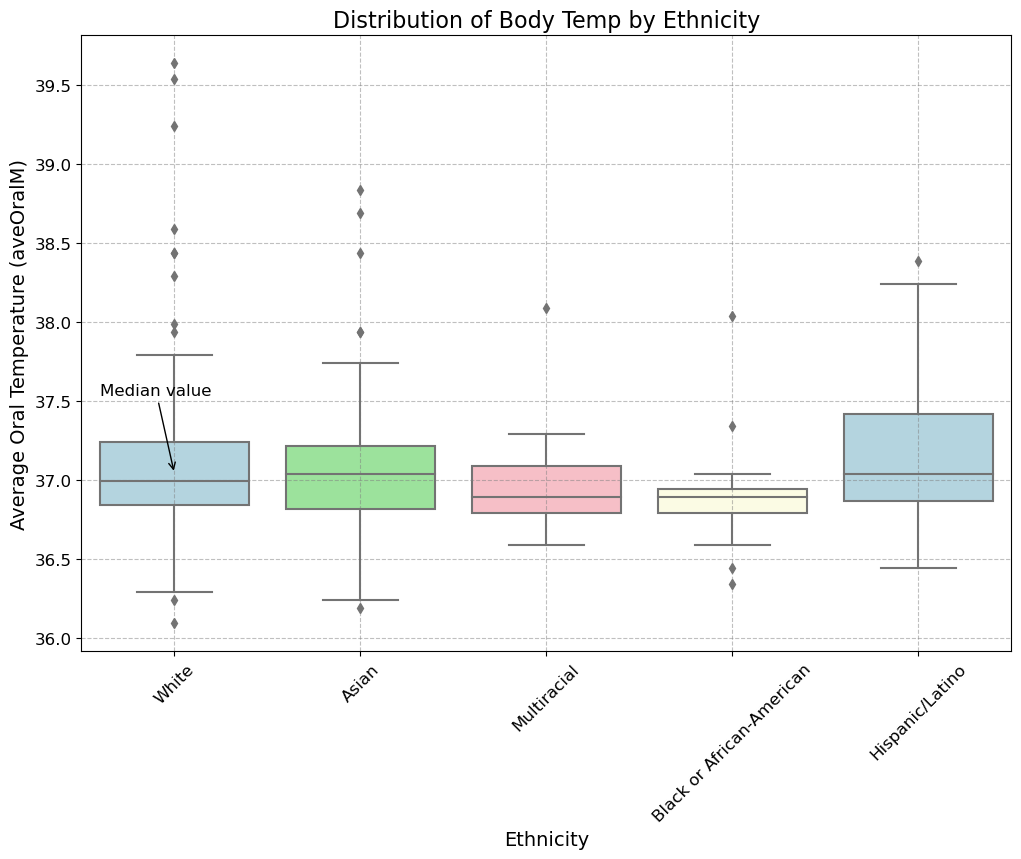

In [27]:
#fig size
plt.figure(figsize=(12, 8))

#generate seaborn boxplot, coustom color pallette
sns.boxplot(data=humid_hot_infrared, x='Ethnicity', y='aveOralM', palette=['lightblue', 'lightgreen', 'lightpink', 'lightyellow'])

#set coustom title
plt.title('Distribution of Body Temp by Ethnicity', fontsize=16)

#set coustom lable with size
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Average Oral Temperature (aveOralM)', fontsize=14)

#set coustom tick with rotated 45 deg x 
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#add median value annotation with arrow
median_value = humid_hot_infrared.groupby('Ethnicity')['aveOralM'].median().iloc[0]
plt.annotate('Median value', xy=(0, median_value), 
             xytext=(-0.4, median_value+0.5),  
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

#add grid lines
plt.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)


plt.show()

### Part 3- Differences between Matplotlib and Seaborn



They were pretty similar. The main difference that I noticed was how integrated seaborn was to pandas. For both graphs, It was more intuitive to generate it using seaborn instead of matplotlib. Not only that, I feel that seaborn is more aesthetically pleasing than matplotlib. I like that you can use seaborn in conjunction with matplotlib. I feel like with matplotlib, you have more options to finetune your visualizations and add the tiniest of details.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

The distribution of body temperature across different ethnic groups appears to be consistent. There seems to be no significant variability tied to ethnicity. However, caution must be taken in drawing definitive conclusions due to the varying sample sizes among these categories, with some groups represented by a small number of observations.

When examining the relationship between ambient temperature and body temperature, the analysis indicates a lack of correlation. The spread of body temperature data points relative to ambient temperatures appears random, with individuals displaying body temperatures both above and below the normal range across all ambient conditions. This randomness suggests that ambient temperature may not be a determining factor for variations in body temperature within the scope of this dataset.

The demographic breakdown of the dataset reveals a higher count of females (606) compared to males (414), which could contribute to the diversity in body temperature observations. Age distribution is heavily skewed towards younger age groups, particularly those between 18 and 25, potentially influencing the overall findings due to physiological differences across age ranges.

In the future, I would like to look at how distance to the infrared camera influences the body temperature measured. I also want to see how that influences the two types of body temperature measured by the experiementors.